# Aircraft Accident Analysis

Author: David Mburu


## Overview

The company I work for is expanding into the aviation industry. I was tasked with identifying the lowest risk aircraft and recommend them for purchase. I used a dataset with aircraft accidents in the US to perform my analysis. I checked for airplane makes and models that are involved in a lot of accidents in the dataset in order to view the fatalities, aircraft damage versus survivals and minor injuries. This helped me to filter down to three makes and nine models with two types of engines that showed the best results.

## Business Problem

The company wants to diversify its portfolio and has decided to venture into aviation. However, they know nothing about aircraft and have sought my expertise to guide them in making a decision to purchase low risk aircraft. 

Some analysis questions I considered were which aircraft are most involved in accidents and thereby filter from the best of them.

This is because aircraft types that have had too few accidents do not have enough data to analyse to assess their viability.

## Data Understanding

I used this [Aviation Accident Dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) from Kaggle to perform analysis. 

The data represents total aircraft accidents in the United States and international waters in the past 50 years. Some variables in the dataset include the **category of aircraft**, **aircraft model**,**accident date**,**Weather conditions**,**types of injuries sustained** among others.

My target variables are **aircraft categories** specifically airplanes since that is what the company wants to purchase, **model**, **make**, **injuries** and **aircraft damage**

All these variables are categorical except for the injuries which are numerical.

In [293]:
#Importing libraries using their conventional aliases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __init__ import explore_dataset
%matplotlib inline

In [294]:
df = explore_dataset('data/aviation_data.csv')     #read the dataset using pandas and store it as a dataframe alias df

c:\Users\Davey\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


----------info----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make        

From the warning it seems some columns do not have consistent data types, we'll fix this during the data preparation step

In [295]:
#checking the dataset was loaded successfully
# df.head()     

In [296]:
# df.tail()

In [297]:
# Getting a feel of the overall dataset
# df.info()

The dataset has 31 columns and about 90,000 rows. Some columns like schedule have a lot of missing data

In [298]:
# some summary statistics about the dataset
# df.describe()

The dataset is asymmetric since mean and median are different values.

Hence during data cleaning it would make more sense to replace missing numerical values with the median so as not to skew the mean.

## Data Preparation

I dropped some columns like **schedule** which are irrelevant to my goal and some like **FAR.Description** which have too many null values.

For the case of aircraft category, I did not drop the entire column despite having too many NaNs since it is important for the business problem. I instead **inferred** the correct airplane category from the makes and models.

I **imputed** missing values using either median or mode in the case of numerical data and 'unknown' in the case of categorical data. Other instances I **dropped** rows and columns with too many missing values.

I also converted columns with different data types into the same data type.

The data contains a lot of noise hence these steps were necessary. Leaving the aircraft category was also necessary due to my stated task.

In [299]:
df.shape    #Checks the initial records of dataset before changes are made. I will keep running this command after every change to see how the dataset is transforming.

(90348, 31)

### Check for duplicates

In [300]:
df.duplicated().value_counts()

False    88958
True      1390
dtype: int64

In [301]:
df[df.duplicated(keep = False)].sort_values(by = 'Event.Id')          # 'keep = false' keeps the duplicates and 'sort_values' places them next to each other

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
64030,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64050,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64052,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64388,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64541,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90004,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90010,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90031,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90090,NaN,20-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [302]:
# Before I start manipulating the dataset I copy it into a new dataframe and remove all the duplicated records

clean_df = df.copy()
clean_df = clean_df.drop_duplicates()
clean_df.shape

(88958, 31)

In [303]:
clean_df.duplicated().value_counts()      #confirm if there are any duplicates remaining

False    88958
dtype: int64

The Event Id column seems to be a unique feature hence necessitates a check for any further duplicates in that column. Also check for any null values and drop them

In [304]:
clean_df.duplicated(subset = 'Event.Id').value_counts()

False    87952
True      1006
dtype: int64

In [305]:
clean_df.drop_duplicates(subset = 'Event.Id', inplace = True)
clean_df.shape

(87952, 31)

In [306]:
#Check for any null values
clean_df['Event.Id'].isna().sum()
clean_df.dropna(subset = ['Event.Id'], inplace = True)
clean_df.shape

(87951, 31)

The Accident number also seems to be a unique feature


In [307]:
#Check all duplicates and nulls have been dropped

clean_df.duplicated(subset = 'Accident.Number').value_counts()
clean_df['Accident.Number'].isna().sum()

0

### Check for null values

In [308]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87951 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                87951 non-null  object 
 1   Investigation.Type      87951 non-null  object 
 2   Accident.Number         87951 non-null  object 
 3   Event.Date              87951 non-null  object 
 4   Location                87899 non-null  object 
 5   Country                 87729 non-null  object 
 6   Latitude                34212 non-null  object 
 7   Longitude               34203 non-null  object 
 8   Airport.Code            49601 non-null  object 
 9   Airport.Name            52117 non-null  object 
 10  Injury.Severity         86961 non-null  object 
 11  Aircraft.damage         84848 non-null  object 
 12  Aircraft.Category       32181 non-null  object 
 13  Registration.Number     86666 non-null  object 
 14  Make                    87888 non-null

#### Dropping

In [309]:
#Drop columns with too many missing values and those

clean_df.drop(columns = ['Latitude', 'Longitude', 'Airport.Code', 'FAR.Description', 'Schedule', 'Air.carrier', 'Publication.Date'], inplace = True)

In [310]:
clean_df.shape

(87951, 24)

In [311]:
clean_df.reset_index(drop = True, inplace = True)     #aligns the index properly with the new data after dropping columns and rows

In [312]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87951 entries, 0 to 87950
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                87951 non-null  object 
 1   Investigation.Type      87951 non-null  object 
 2   Accident.Number         87951 non-null  object 
 3   Event.Date              87951 non-null  object 
 4   Location                87899 non-null  object 
 5   Country                 87729 non-null  object 
 6   Airport.Name            52117 non-null  object 
 7   Injury.Severity         86961 non-null  object 
 8   Aircraft.damage         84848 non-null  object 
 9   Aircraft.Category       32181 non-null  object 
 10  Registration.Number     86666 non-null  object 
 11  Make                    87888 non-null  object 
 12  Model                   87859 non-null  object 
 13  Amateur.Built           87851 non-null  object 
 14  Number.of.Engines       81924 non-null

In [313]:
clean_df.isna().sum()     #Check total null values by column

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     222
Airport.Name              35834
Injury.Severity             990
Aircraft.damage            3103
Aircraft.Category         55770
Registration.Number        1285
Make                         63
Model                        92
Amateur.Built               100
Number.of.Engines          6027
Engine.Type                7024
Purpose.of.flight          6122
Total.Fatal.Injuries      11267
Total.Serious.Injuries    12322
Total.Minor.Injuries      11760
Total.Uninjured            5863
Weather.Condition          4473
Broad.phase.of.flight     27114
Report.Status              6361
dtype: int64

In [314]:
clean_df['Broad.phase.of.flight'].value_counts()   

Landing        15320
Takeoff        12404
Cruise         10141
Maneuvering     8052
Approach        6389
Climb           1995
Descent         1870
Taxi            1786
Go-around       1345
Standing         872
Unknown          547
Other            116
Name: Broad.phase.of.flight, dtype: int64

The flight phase column has the most null values, the top non-null values have small gaps between them. This means imputing would exagerate a certain category by a lot hence it makes more sense to drop the missing values.

In [315]:
clean_df.dropna(subset = ['Broad.phase.of.flight','Location'], inplace = True)
clean_df.shape

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60823 entries, 0 to 62999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                60823 non-null  object 
 1   Investigation.Type      60823 non-null  object 
 2   Accident.Number         60823 non-null  object 
 3   Event.Date              60823 non-null  object 
 4   Location                60823 non-null  object 
 5   Country                 60612 non-null  object 
 6   Airport.Name            36520 non-null  object 
 7   Injury.Severity         60823 non-null  object 
 8   Aircraft.damage         59447 non-null  object 
 9   Aircraft.Category       7300 non-null   object 
 10  Registration.Number     60804 non-null  object 
 11  Make                    60812 non-null  object 
 12  Model                   60793 non-null  object 
 13  Amateur.Built           60805 non-null  object 
 14  Number.of.Engines       59928 non-null

#### Imputing

In [316]:
clean_df['Country'].fillna(clean_df['Country'].mode, inplace = True)
clean_df['Airport.Name'].fillna('Outside Airport', inplace = True)
clean_df['Injury.Severity'].fillna(clean_df['Injury.Severity'].mode, inplace = True)
clean_df['Aircraft.damage'].fillna(clean_df['Aircraft.damage'].mode, inplace = True)
clean_df['Registration.Number'].fillna('Unknown', inplace = True)
clean_df['Make'].fillna(clean_df['Make'].mode, inplace = True)
clean_df['Model'].fillna(clean_df['Model'].mode, inplace = True)
clean_df['Amateur.Built'].fillna(clean_df['Amateur.Built'].mode, inplace = True)
clean_df['Number.of.Engines'].fillna(clean_df['Number.of.Engines'].median(), inplace = True)
clean_df['Engine.Type'].fillna('Unknown', inplace = True)
clean_df['Purpose.of.flight'].fillna('Unknown', inplace = True)
clean_df['Total.Fatal.Injuries'].fillna(clean_df['Total.Fatal.Injuries'].median(), inplace = True)
clean_df['Total.Serious.Injuries'].fillna(clean_df['Total.Serious.Injuries'].median(), inplace = True)
clean_df['Total.Minor.Injuries'].fillna(clean_df['Total.Minor.Injuries'].median(), inplace = True)
clean_df['Total.Uninjured'].fillna(clean_df['Total.Uninjured'].median(), inplace = True)
clean_df['Weather.Condition'].fillna(clean_df['Weather.Condition'].mode, inplace = True)

In [317]:
clean_df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Airport.Name                  0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         53523
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
dtype: int64

In [318]:
#Impute values into the aircraft category by referencing the make and model columns

category_map = clean_df.dropna(subset=['Aircraft.Category']).set_index(['Make', 'Model'])['Aircraft.Category'].to_dict()

clean_df['Aircraft.Category'] = clean_df.apply(
    lambda row: category_map.get((row['Make'], row['Model']), row['Aircraft.Category']),
    axis=1
)
clean_df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Airport.Name                  0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         13857
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
dtype: int64

The remaining nulls can be filled up with the mode

In [319]:
clean_df['Aircraft.Category'].fillna('Unknown', inplace = True)

In [320]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60823 entries, 0 to 62999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                60823 non-null  object 
 1   Investigation.Type      60823 non-null  object 
 2   Accident.Number         60823 non-null  object 
 3   Event.Date              60823 non-null  object 
 4   Location                60823 non-null  object 
 5   Country                 60823 non-null  object 
 6   Airport.Name            60823 non-null  object 
 7   Injury.Severity         60823 non-null  object 
 8   Aircraft.damage         60823 non-null  object 
 9   Aircraft.Category       60823 non-null  object 
 10  Registration.Number     60823 non-null  object 
 11  Make                    60823 non-null  object 
 12  Model                   60823 non-null  object 
 13  Amateur.Built           60823 non-null  object 
 14  Number.of.Engines       60823 non-null

In [321]:
clean_df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
Purpose.of.flight          object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status              object
dtype: object

### Check for any extrenous values

In [322]:
# Check if values in the same column are of the same datatype
for col in clean_df:
    print(clean_df[col].apply(type).nunique() > 1)

False
False
False
False
False
True
False
False
True
False
False
True
True
True
False
False
False
False
False
False
False
True
False
False


In [323]:
clean_df['Country'] = clean_df['Country'].astype(str)
clean_df['Aircraft.damage'] = clean_df['Aircraft.damage'].astype(str)
clean_df['Aircraft.Category'] = clean_df['Aircraft.Category'].astype(str)
clean_df['Make'] = clean_df['Make'].astype(str)
clean_df['Model'] = clean_df['Model'].astype(str)
clean_df['Amateur.Built'] = clean_df['Amateur.Built'].astype(str)
clean_df['Number.of.Engines'] = clean_df['Number.of.Engines'].astype(float)   
clean_df['Engine.Type'] = clean_df['Engine.Type'].astype(str)                       
clean_df['Purpose.of.flight'] = clean_df['Purpose.of.flight'].astype(str)  
clean_df['Weather.Condition'] = clean_df['Weather.Condition'].astype(str)


In [324]:
#check further for any hidden extrenous values
for col in clean_df:
    print(col, '\n',clean_df[col].value_counts().head(), '\n')


Event.Id 
 20001207X04213    1
20001208X06422    1
20001211X09589    1
20001211X10025    1
20070717X00948    1
Name: Event.Id, dtype: int64 

Investigation.Type 
 Accident    59011
Incident     1812
Name: Investigation.Type, dtype: int64 

Accident.Number 
 SEA06CA102    1
FTW98FA316    1
CHI86FEM01    1
CHI03LA157    1
NYC91LA007    1
Name: Accident.Number, dtype: int64 

Event.Date 
 1982-05-16    25
1984-06-30    25
1983-06-05    24
1984-08-25    23
1983-08-05    23
Name: Event.Date, dtype: int64 

Location 
 ANCHORAGE, AK      421
MIAMI, FL          194
ALBUQUERQUE, NM    189
HOUSTON, TX        184
FAIRBANKS, AK      170
Name: Location, dtype: int64 

Country 
 United States                                                                                                                                                                                                                                                                                                                         

In [325]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60823 entries, 0 to 62999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                60823 non-null  object 
 1   Investigation.Type      60823 non-null  object 
 2   Accident.Number         60823 non-null  object 
 3   Event.Date              60823 non-null  object 
 4   Location                60823 non-null  object 
 5   Country                 60823 non-null  object 
 6   Airport.Name            60823 non-null  object 
 7   Injury.Severity         60823 non-null  object 
 8   Aircraft.damage         60823 non-null  object 
 9   Aircraft.Category       60823 non-null  object 
 10  Registration.Number     60823 non-null  object 
 11  Make                    60823 non-null  object 
 12  Model                   60823 non-null  object 
 13  Amateur.Built           60823 non-null  object 
 14  Number.of.Engines       60823 non-null

The dataset is now clean and ready to be modeled

In [326]:
#convert to csv to upload to Github and excel to use in tableau visualizations (I have commented the code out so it doesn't create new files every time I run the code) 

# clean_df.to_csv('/data/cleaned_aviation_data.csv', index = False)
# clean_df.to_excel('cleaned_aviation_data.xlsx', index = False)

## Data Modeling

I did some simple models to get an overview of the accidents in the aviation industry

I did more business specific visualizations in tableau which I have linked in the readme file since they are too large to be included here

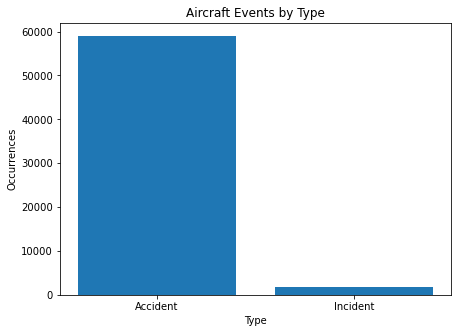

In [327]:
plt.figure(figsize = (7,5))
plt.bar(clean_df['Investigation.Type'].value_counts().index, clean_df['Investigation.Type'].value_counts().values)
plt.title('Aircraft Events by Type')
plt.xlabel('Type')
plt.ylabel('Occurrences');

Most aircraft events are accidents

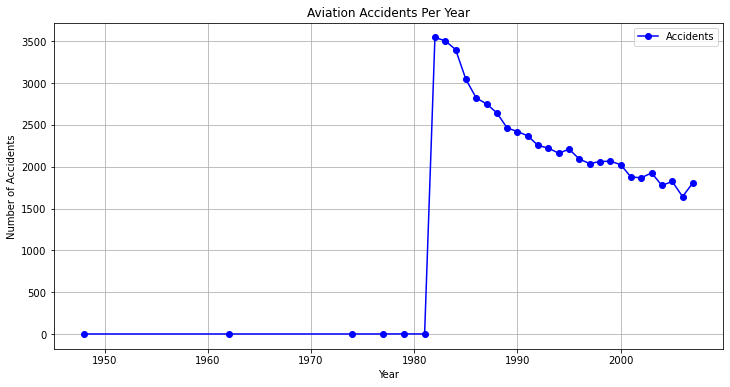

In [328]:
clean_df['Event.Date'] = pd.to_datetime(clean_df['Event.Date'], errors = 'coerce')
clean_df['Year'] = clean_df['Event.Date'].dt.year
accidents = clean_df['Year'].value_counts().sort_index()    #count accidents per year

plt.figure(figsize=(12, 6))  # Set figure size
plt.plot(accidents.index, accidents.values, marker='o', linestyle='-', color='b', label="Accidents")

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Aviation Accidents Per Year")
plt.grid(True)  # Add grid lines
plt.legend()  # Show legend

# Show the plot
plt.show()

Aircraft accidents shot up sharply in the early 1980's but have been gradually decreasing

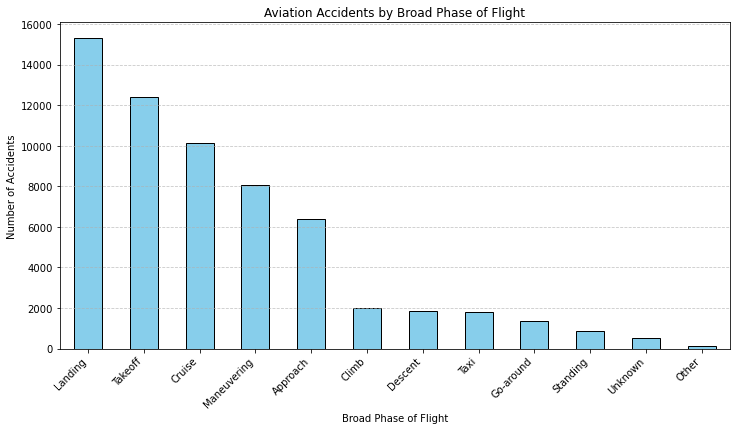

In [329]:
accident_by_phase = clean_df['Broad.phase.of.flight'].value_counts()

plt.figure(figsize=(12, 6))  # Set figure size
accident_by_phase.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel("Broad Phase of Flight")
plt.ylabel("Number of Accidents")
plt.title("Aviation Accidents by Broad Phase of Flight")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7);  # Add grid for better readability

Most accidents occur during landing

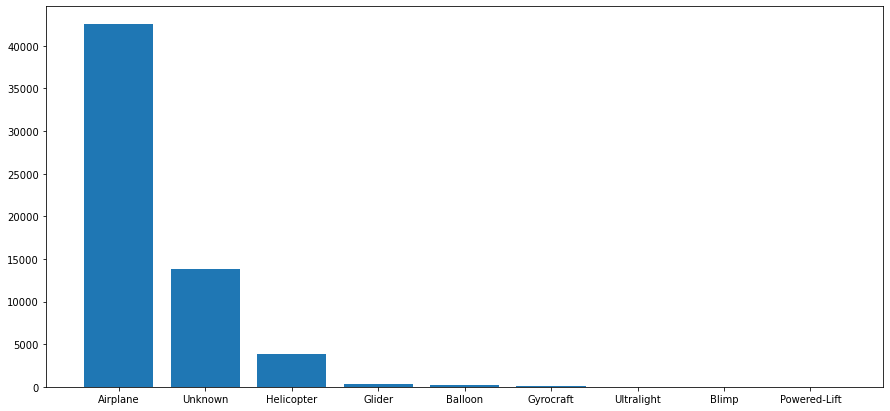

In [330]:
aircrafts = clean_df['Aircraft.Category'].value_counts()
makes = clean_df['Make'].value_counts()
models = clean_df['Model'].value_counts()

fig, ax = plt.subplots(figsize = (15,7))

ax.bar(aircrafts.index, aircrafts.values);



Airplanes have the most accidents. However this is not due to them being unsafe but due to the fact that they are heavily far more than the other categories.

This is also why I checked for the aircraft types with more accidents because they have data about their usage to make good business recomendations to the client

## Evaluation

From the results there are three concrete recommendations I can make for aircraft purchase based on make, model and engine type:

Make: Boeing, Mcdonnell Douglas and Lockheed

Model: Based on the above three, the safest models are: Boeing 747-200, 737-300 and 727. 
                                                        Mcdonnell Douglas MD-88, DC-10-30 and DC-9-51.
                                                        Lockheed L-1011, L-1011-385-3 and L-1011-385

Engine: The best engines for aircraft are 'Turbo fan' and 'Turbo jet'

## Conclusion

I would recommend the business to purchase aircraft based on the above three guidelines

My analysis may not fully solve the problem since there are still too many variables involved that were not reflected in the dataset.

In future I could build a machine learning algorithm that takes into account all variables to better predict the safe kind of aircraft.